In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np


def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [3]:
with open('CNN_DB-mel_Original.json', "r") as f:
    data1 = json.load(f)
    
x1 = data1['spect']
y1 = data1['label']

In [4]:
D = []
for ps,label in zip(x1,y1):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [5]:
import gc

del data1
del x1
del y1
gc.collect()

0

In [7]:
with open('CNN_DB-mel_RateBoosted_0.81.json', "r") as f:
    data2 = json.load(f)
    
x2 = data2['spect']
y2 = data2['label']

In [8]:
for ps,label in zip(x2,y2):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [9]:
del data2
del x2
del y2
gc.collect()

0

In [10]:
with open('CNN_DB-mel_PitchBoosted_2.5.json', "r") as f:
    data3 = json.load(f)
    
x3 = data3['spect']
y3 = data3['label']

In [11]:
for ps,label in zip(x3,y3):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [12]:
del data3
del x3
del y3
gc.collect()

0

In [13]:
with open('CNN_DB-mel_PitchBoosted_-2.5.json', "r") as f:
    data4 = json.load(f)
    
x4 = data4['spect']
y4 = data4['label']

for ps,label in zip(x4,y4):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )
    
len(D)

36805

In [14]:
del data4
del x4
del y4
gc.collect()

0

In [15]:
with open('CNN_DB-mel_SpecAugumentation.json', "r") as f:
    data5 = json.load(f)
    
x5 = data5['spect']
y5 = data5['label']

for ps,label in zip(x5,y5):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )
    
len(D)

46043

In [16]:
del data5
del x5
del y5
gc.collect()

0

In [17]:
with open('CNN_DB-mel_RateBoosted_1.07.json', "r") as f:
    data6 = json.load(f)
    
x6 = data6['spect']
y6 = data6['label']

for ps,label in zip(x6,y6):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )
    
len(D)

55317

In [18]:
del data6
del x6
del y6
gc.collect()

0

In [22]:
len(D)

55317

In [23]:
del dataset
del train
del validate
del test
gc.collect()

8

In [24]:
del X_train
del X_validate
del X_test
del y_train
del y_validate
del y_test
gc.collect()

0

In [25]:
random.shuffle(D)
len(D)

55317

In [26]:
train = D[:44000]
D = D[44000:]
X_train, y_train = zip(*train)
del train
gc.collect()

0

In [27]:
validate = D[:5700]
test = D[5700:]
X_validate, y_validate = zip(*validate)
X_test, y_test = zip(*test)
del validate
del test
gc.collect()

0

In [28]:
# Reshape for CNN input
X_train = np.array([x.reshape( (128, 400, 1) ) for x in X_train])
X_validate = np.array([x.reshape( (128, 400, 1) ) for x in X_validate])
X_test = np.array([x.reshape( (128, 400, 1) ) for x in X_test])

In [32]:
gc.collect()

26

In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))
#y
y_train = np.array(to_categorical(labelencoder.fit_transform(y_train)))
y_validate = np.array(to_categorical(labelencoder.fit_transform(y_validate)))
y_test = np.array(to_categorical(labelencoder.fit_transform(y_test)))

In [34]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((44000, 128, 400, 1),
 (5700, 128, 400, 1),
 (5617, 128, 400, 1),
 (44000, 2),
 (5700, 2),
 (5617, 2))

In [35]:
gc.collect()

0

In [36]:
model = Sequential()
input_shape=(128, 400, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 396, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 198, 24)      0         
 )                                                               
                                                                 
 activation (Activation)     (None, 31, 198, 24)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 194, 48)       28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 97, 48)        0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 6, 97, 48)         0

In [37]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=X_train, 
	y=y_train,
    epochs=25,
    batch_size=128,
    validation_data= (X_validate, y_validate))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
344/344 [==============================] - 998s 3s/step - loss: 0.6486 - accuracy: 0.6753 - val_loss: 0.5915 - val_accuracy: 0.6888
Epoch 2/25
344/344 [==============================] - 936s 3s/step - loss: 0.5673 - accuracy: 0.7258 - val_loss: 0.4919 - val_accuracy: 0.7811
Epoch 3/25
344/344 [==============================] - 875s 3s/step - loss: 0.5017 - accuracy: 0.7655 - val_loss: 0.4068 - val_accuracy: 0.8351
Epoch 4/25
344/344 [==============================] - 865s 3s/step - loss: 0.4191 - accuracy: 0.8122 - val_loss: 0.3146 - val_accuracy: 0.8684
Epoch 5/25
344/344 [==============================] - 863s 3s/step - loss: 0.3263 - accuracy: 0.8618 - val_loss: 0.2162 - val_accuracy: 0.9082
Epoch 6/25
344/344 [==============================] - 855s 2s/step - loss: 0.2502 - accuracy: 0.8975 - val_loss: 0.1728 - val_accuracy: 0.9268
Epoch 7/25
344/344 [==============================] - 860s 3s/step - loss: 0.1984 - accuracy: 0.9201 - val_loss: 0.1257 - val_accuracy: 0.9516

In [38]:
model.save('CNN_DB-mel_FinalCombined_model')

INFO:tensorflow:Assets written to: CNN_DB-mel_FinalCombined_model\assets


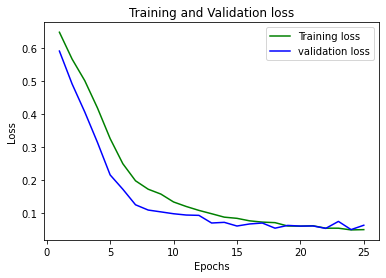

In [39]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

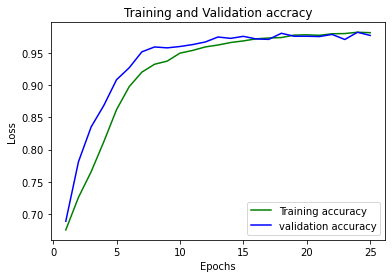

In [40]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
reconstructed_model = keras.models.load_model("CNN_DB-mel_FinalCombined_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

176/176 [==============================] - 30s 169ms/step - loss: 0.0695 - accuracy: 0.9740
Test loss: 0.06949389725923538
Test accuracy: 0.9740074872970581
